In [72]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Supaya grafik tampil rapi
sns.set(style="whitegrid")

In [73]:
# Load dataset
df = pd.read_csv("dataset_kelayakan_beasiswa.csv")

# Tampilkan 5 data pertama
df.head()

,IPK,Semester,Jurusan,Pernah_Mengulang,Pendapatan_Orang_Tua,Pekerjaan_Orang_Tua,Jumlah_Tanggungan,Status_Tempat_Tinggal,Asal_Daerah,Aktif_Organisasi,...,Skor_Motivasi_Tertulis,Surat_Rekomendasi,Pernah_Mendapat_Beasiswa,Skor_Keaktifan_Kampus,Rekam_Ketidakhadiran,Pernah_Melawan_Hukum,Jenis_Kelamin,Skor_Literasi_Finansial,Status_Kelayakan,Jumlah_Beasiswa_Per_Semester
0,3.40,2,Teknik Informatika,Tidak,4608603,Pedagang,2,Menumpang,3T,Tidak,...,77,Ada,Ya,55,6,Tidak,Laki-laki,71,Layak,3667971
1,3.14,7,Kedokteran,Tidak,5167265,Tidak Bekerja,1,Milik Sendiri,Perkotaan,Ya,...,98,Tidak,Ya,55,12,Tidak,Perempuan,77,Tidak Layak,0
2,3.83,5,Teknik Informatika,Tidak,9496414,Petani,4,Milik Sendiri,Pedesaan,Tidak,...,73,Ada,Ya,52,7,Tidak,Laki-laki,29,Tidak Layak,0
3,3.51,2,Ekonomi,Tidak,6620868,Pedagang,3,Kontrak,Pedesaan,Ya,...,88,Ada,Ya,60,14,Tidak,Laki-laki,87,Layak,4720280
4,3.01,1,Kedokteran,Tidak,5792423,Karyawan Swasta,3,Milik Sendiri,Pedesaan,Tidak,...,91,Tidak,Tidak,91,14,Tidak,Laki-laki,31,Tidak Layak,0


In [74]:
# Info dataset
df.info()

# Statistik deskriptif
df.describe()

# Cek jumlah baris & kolom
print("Jumlah Baris:", df.shape[0])
print("Jumlah Kolom:", df.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   IPK                           2000 non-null   float64
 1   Semester                      2000 non-null   int64  
 2   Jurusan                       2000 non-null   object 
 3   Pernah_Mengulang              2000 non-null   object 
 4   Pendapatan_Orang_Tua          2000 non-null   int64  
 5   Pekerjaan_Orang_Tua           2000 non-null   object 
 6   Jumlah_Tanggungan             2000 non-null   int64  
 7   Status_Tempat_Tinggal         2000 non-null   object 
 8   Asal_Daerah                   2000 non-null   object 
 9   Aktif_Organisasi              2000 non-null   object 
 10  Jumlah_Kegiatan_Relawan       2000 non-null   int64  
 11  Pengalaman_Magang             2000 non-null   object 
 12  Skor_Motivasi_Tertulis        2000 non-null   int64  
 13  Sur

In [75]:
# Cek missing value
missing = df.isnull().sum()

# Tampilkan kolom yang punya missing value saja
missing[missing > 0]

Series([], dtype: int64)

In [76]:
for col in df.select_dtypes(include=np.number).columns:
    df[col] = df[col].fillna(df[col].mean())

In [77]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [78]:
df.isnull().sum()

IPK                             0
Semester                        0
Jurusan                         0
Pernah_Mengulang                0
Pendapatan_Orang_Tua            0
Pekerjaan_Orang_Tua             0
Jumlah_Tanggungan               0
Status_Tempat_Tinggal           0
Asal_Daerah                     0
Aktif_Organisasi                0
Jumlah_Kegiatan_Relawan         0
Pengalaman_Magang               0
Skor_Motivasi_Tertulis          0
Surat_Rekomendasi               0
Pernah_Mendapat_Beasiswa        0
Skor_Keaktifan_Kampus           0
Rekam_Ketidakhadiran            0
Pernah_Melawan_Hukum            0
Jenis_Kelamin                   0
Skor_Literasi_Finansial         0
Status_Kelayakan                0
Jumlah_Beasiswa_Per_Semester    0
dtype: int64

In [79]:
# Cek jumlah duplikat
df.duplicated().sum()

np.int64(0)

In [80]:
# Hapus data duplikat
df = df.drop_duplicates()

# Cek ulang
df.duplicated().sum()

np.int64(0)

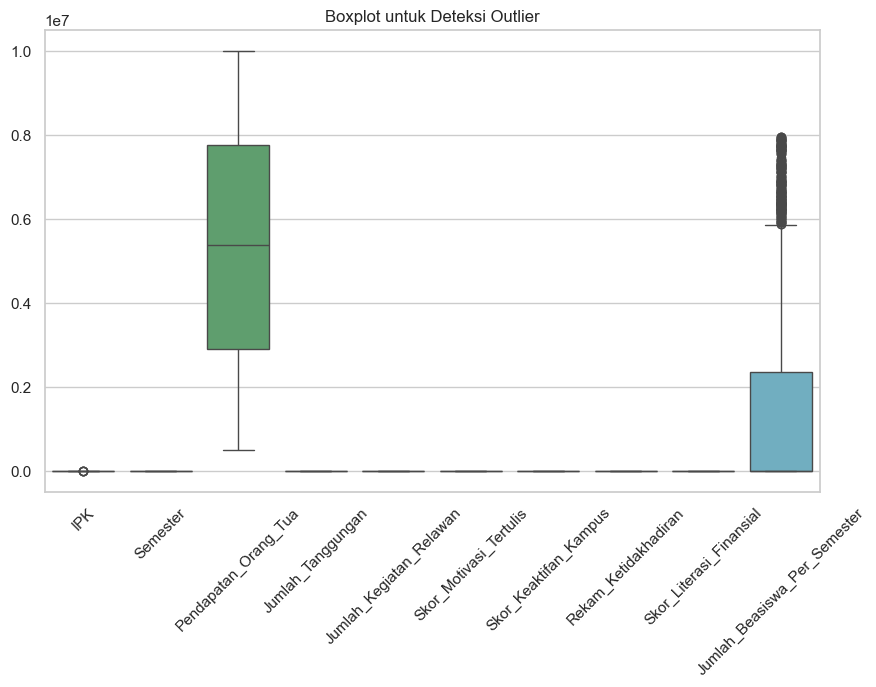

In [81]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.xticks(rotation=45)
plt.title("Boxplot untuk Deteksi Outlier")
plt.show()

In [82]:
# Fungsi deteksi outlier dengan IQR
def detect_outliers_iqr(data):
    outlier_indices = []
    
    for col in data.select_dtypes(include=np.number).columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)].index
        outlier_indices.extend(outliers)
    
    return list(set(outlier_indices))

outliers = detect_outliers_iqr(df)
print("Jumlah data outlier:", len(outliers))

Jumlah data outlier: 185


In [83]:
print("Jumlah data awal:", df.shape[0])
print("Jumlah outlier:", len(outliers))
print("Persentase outlier:", (len(outliers)/df.shape[0])*100, "%")

Jumlah data awal: 2000
Jumlah outlier: 185
Persentase outlier: 9.25 %


In [84]:
# Hapus outlier
df_clean = df.drop(index=outliers)

print("Jumlah data setelah hapus outlier:", df_clean.shape[0])

Jumlah data setelah hapus outlier: 1815


In [85]:
# Hilangkan spasi berlebih
for col in df_clean.select_dtypes(include='object').columns:
    df_clean[col] = df_clean[col].str.strip()

In [86]:
for col in df_clean.select_dtypes(include='object').columns:
    df_clean[col] = df_clean[col].str.lower()

In [87]:
for col in df_clean.select_dtypes(include='object').columns:
    print(f"\nKolom: {col}")
    print(df_clean[col].unique())


Kolom: Jurusan
['teknik informatika' 'kedokteran' 'ekonomi' 'hukum' 'manajemen'
 'pertanian' 'sastra' 'pendidikan']

Kolom: Pernah_Mengulang
['tidak' 'ya']

Kolom: Pekerjaan_Orang_Tua
['pedagang' 'tidak bekerja' 'petani' 'karyawan swasta' 'pegawai negeri'
 'wirausaha' 'buruh']

Kolom: Status_Tempat_Tinggal
['menumpang' 'milik sendiri' 'kontrak']

Kolom: Asal_Daerah
['3t' 'perkotaan' 'pedesaan']

Kolom: Aktif_Organisasi
['tidak' 'ya']

Kolom: Pengalaman_Magang
['ya' 'tidak']

Kolom: Surat_Rekomendasi
['ada' 'tidak']

Kolom: Pernah_Mendapat_Beasiswa
['ya' 'tidak']

Kolom: Pernah_Melawan_Hukum
['tidak' 'ya']

Kolom: Jenis_Kelamin
['laki-laki' 'perempuan']

Kolom: Status_Kelayakan
['layak' 'tidak layak']


In [88]:
df_clean.to_csv("dataset_kelayakan_beasiswa_clean.csv", index=False)